In [1]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator, FixedLocator

In [2]:
names1 = ['apo', 'bound', 'allo-apo', 'allo-bound', 'allo-both']
names2 = ['g2489a', 'g249v', 'g249w', 'og249w']

In [3]:
def treat_energy_matrix(data):
    modified = np.zeros(np.shape(data))
    for i in range(len(modified)):
        for j in range(len(modified[i])):
            if np.isinf(data[i][j]) == True:
                modified[i][j] = -1*np.inf
            else:
                modified[i][j] = data[i][j] + 0
    #
    modified=modified - np.max(modified)
    #
    for i in range(len(modified)):
        for j in range(len(modified[i])):
            if np.isinf(modified[i][j]) == True:
                modified[i][j] = np.inf
    #
    return modified

In [4]:
bin1=np.arange(0.6,2.6,0.03)
xb1=np.array([(bin1[i]+bin1[i+1])/2 for i in range(len(bin1)-1)])

In [5]:
bin2=np.arange(1.4,3.4,0.03)
xb2=np.array([(bin2[i]+bin2[i+1])/2 for i in range(len(bin2)-1)])

In [6]:
xmin, xmax = 0.6, 2.6
ymin, ymax = 1.5, 3.3

In [7]:
wt1=[np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_4jx1_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in 
     names1]

wt2=[np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_4jx1_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in names1]

In [8]:
hwt = [
    treat_energy_matrix(
        -0.6 * np.log(np.histogram2d(wt1[a], wt2[a], bins=[bin1,bin2], density=True)[0].T)
    )
for a,_ in enumerate(wt1)]

/tmp/ipykernel_639395/525705672.py:3: RuntimeWarning: divide by zero encountered in log
  -0.6 * np.log(np.histogram2d(wt1[a], wt2[a], bins=[bin1,bin2], density=True)[0].T)


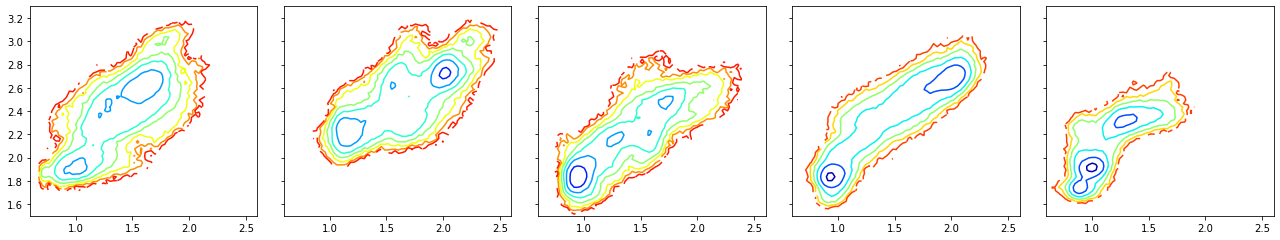

In [49]:
fig,ax=plt.subplots(1,len(hwt), figsize=(18/5*len(hwt),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hwt):
    ax[a].contour(xb1, xb2, h, vmin=-5, vmax=0, cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

In [9]:
closed1 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_{n}_apo.xvg',
comments=['@','#'])[:,1]
          for n in names2]

closed2 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_{n}_apo.xvg',
comments=['@','#'])[:,1]
          for n in names2]

In [10]:
hclosed = [
    treat_energy_matrix(
        -0.6 * np.log(np.histogram2d(closed1[a], closed2[a], bins=[bin1,bin2], density=True)[0].T)
    )
for a,_ in enumerate(closed1)]

/tmp/ipykernel_639395/1931716287.py:3: RuntimeWarning: divide by zero encountered in log
  -0.6 * np.log(np.histogram2d(closed1[a], closed2[a], bins=[bin1,bin2], density=True)[0].T)


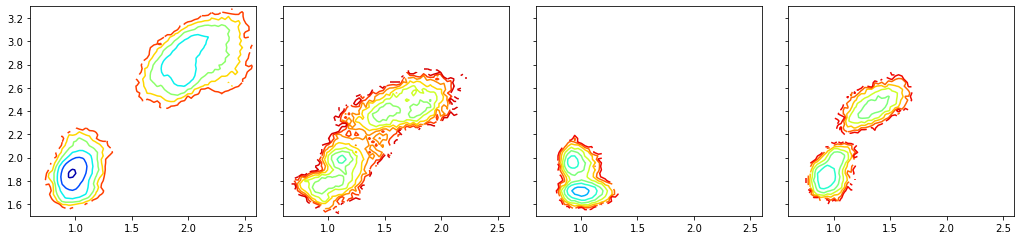

In [50]:
fig,ax=plt.subplots(1,len(hclosed), figsize=(18/5*len(hclosed),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hclosed):
    ax[a].contour(xb1, xb2, h, vmin=-5, vmax=0, cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

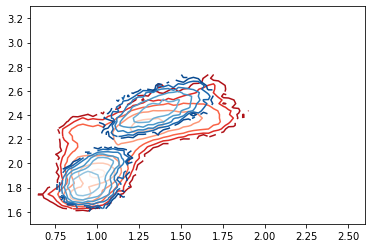

In [51]:
plt.contour(xb1, xb2, hwt[-1], vmin=-5, vmax=0, cmap='Reds')
plt.contour(xb1, xb2, hclosed[-1], vmin=-5, vmax=0, cmap='Blues')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

In [11]:
opened1 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_l166a_{n}.xvg',
comments=['@','#'])[:,1]
          for n in names1[:2]]

opened2 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_l166a_{n}.xvg',
comments=['@','#'])[:,1]
          for n in names1[:2]]

In [12]:
hopened = [
    treat_energy_matrix(
        -0.6 * np.log(np.histogram2d(opened1[a], opened2[a], bins=[bin1,bin2], density=True)[0].T)
    )
for a,_ in enumerate(opened1)]

/tmp/ipykernel_639395/3746544807.py:3: RuntimeWarning: divide by zero encountered in log
  -0.6 * np.log(np.histogram2d(opened1[a], opened2[a], bins=[bin1,bin2], density=True)[0].T)


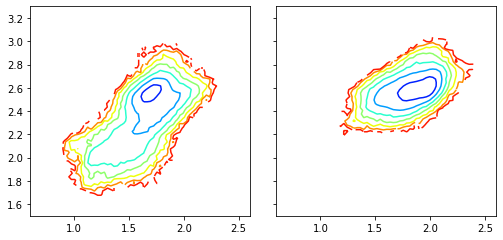

In [52]:
fig,ax=plt.subplots(1,len(hopened), figsize=(18/5*len(hopened),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hopened):
    ax[a].contour(xb1, xb2, h, vmin=-5, vmax=0, cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

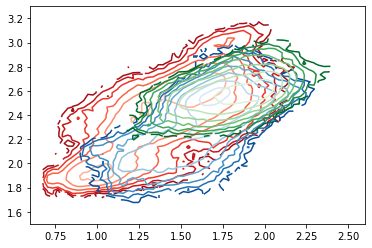

In [56]:
plt.contour(xb1, xb2, hwt[0], vmin=-5, vmax=0, cmap='Reds')
plt.contour(xb1, xb2, hopened[0], vmin=-5, vmax=0, cmap='Blues')
plt.contour(xb1, xb2, hopened[-1], vmin=-5, vmax=0, cmap='Greens')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

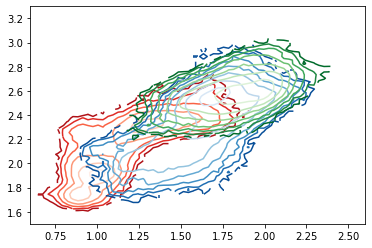

In [57]:
plt.contour(xb1, xb2, hwt[-1], vmin=-5, vmax=0, cmap='Reds')
plt.contour(xb1, xb2, hopened[0], vmin=-5, vmax=0, cmap='Blues')
plt.contour(xb1, xb2, hopened[-1], vmin=-5, vmax=0, cmap='Greens')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

In [13]:
decoupled1 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_f163a_{n}.xvg',
comments=['@','#'])[:,1]
             for n in names1]

decoupled2 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_f163a_{n}.xvg',
comments=['@','#'])[:,1]
             for n in names1]

In [14]:
hdecoupled = [
    treat_energy_matrix(
        -0.6 * np.log(np.histogram2d(decoupled1[a], decoupled2[a], bins=[bin1,bin2], density=True)[0].T)
    )
for a,_ in enumerate(decoupled1)]

/tmp/ipykernel_639395/494400886.py:3: RuntimeWarning: divide by zero encountered in log
  -0.6 * np.log(np.histogram2d(decoupled1[a], decoupled2[a], bins=[bin1,bin2], density=True)[0].T)


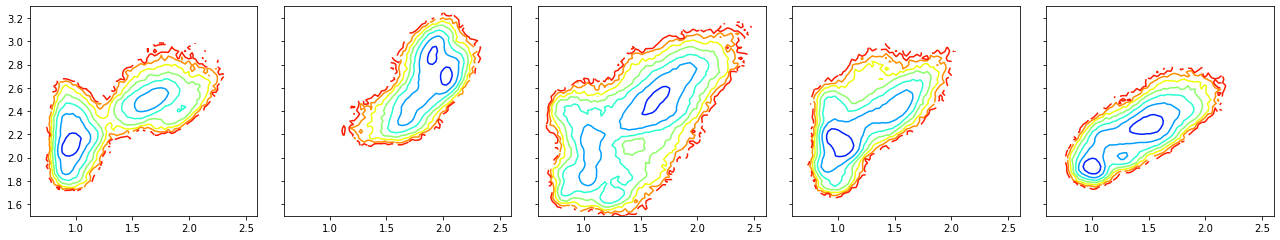

In [60]:
fig,ax=plt.subplots(1,len(hdecoupled), figsize=(18/5*len(hdecoupled),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hdecoupled):
    ax[a].contour(xb1, xb2, h, vmin=-5, vmax=0, cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

In [57]:
mdecoupled1 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_multi_{n}.xvg',
comments=['@','#'])[:,1]
             for n in names1]

mdecoupled2 = [np.loadtxt(
f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_multi_{n}.xvg',
comments=['@','#'])[:,1]
             for n in names1]

In [58]:
mhdecoupled = [
    treat_energy_matrix(
        -0.6 * np.log(np.histogram2d(mdecoupled1[a], mdecoupled2[a], bins=[bin1,bin2], density=True)[0].T)
    )
for a,_ in enumerate(mdecoupled1)]

/tmp/ipykernel_639395/1820754009.py:3: RuntimeWarning: divide by zero encountered in log
  -0.6 * np.log(np.histogram2d(mdecoupled1[a], mdecoupled2[a], bins=[bin1,bin2], density=True)[0].T)


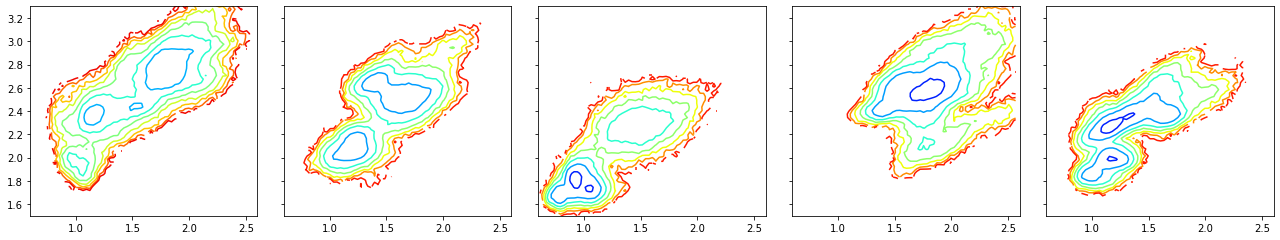

In [13]:
fig,ax=plt.subplots(1,len(mhdecoupled), figsize=(18/5*len(mhdecoupled),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(mhdecoupled):
    ax[a].contour(xb1, xb2, h, vmin=-5, vmax=0, cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

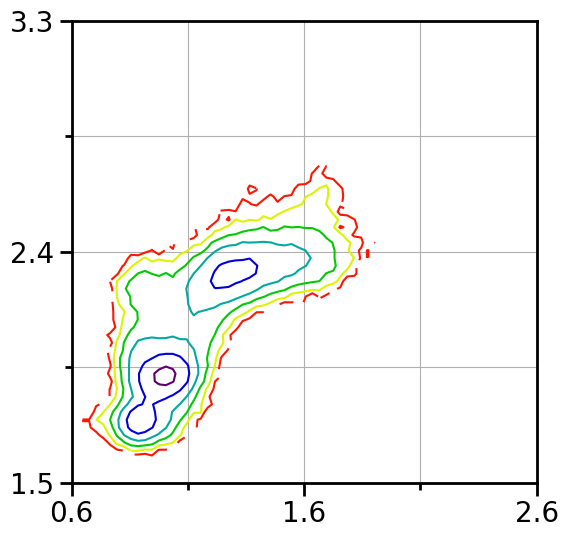

In [43]:
curve = hwt[4]
oname='ch1_wt_3s'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contour(xb1, xb2, curve, cmap='nipy_spectral', vmin=-5, vmax=0)
ax.grid(which='both')
ax.set_xlim(xmin,xmax)
ax.set_xticks([0.6,1.6,2.6])
ax.set_ylim(ymin,ymax)
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.xaxis.set_minor_locator(FixedLocator([1.1,2.1]))
ax.yaxis.set_minor_locator(FixedLocator([1.95,2.85]))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

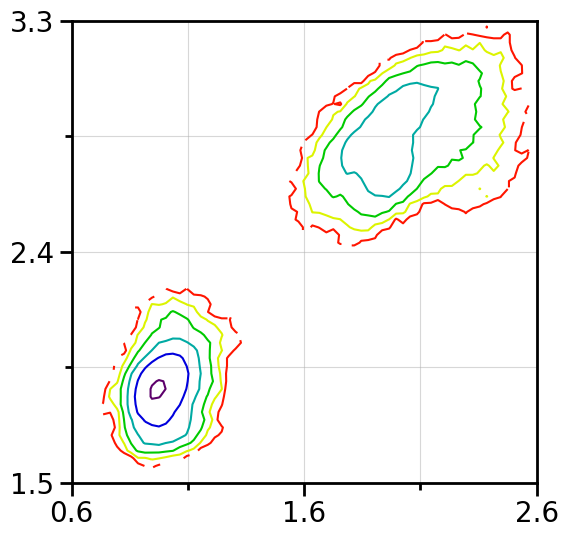

In [48]:
curve = hclosed[0]
oname='ch1_g2489a_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contour(xb1, xb2, curve, cmap='nipy_spectral', vmin=-5, vmax=0)
#
ax.grid(alpha=0.5, which='both')
ax.set_xlim(xmin,xmax)
ax.set_xticks([0.6,1.6,2.6])
ax.set_ylim(ymin,ymax)
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.xaxis.set_minor_locator(FixedLocator([1.1,2.1]))
ax.yaxis.set_minor_locator(FixedLocator([1.95,2.85]))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

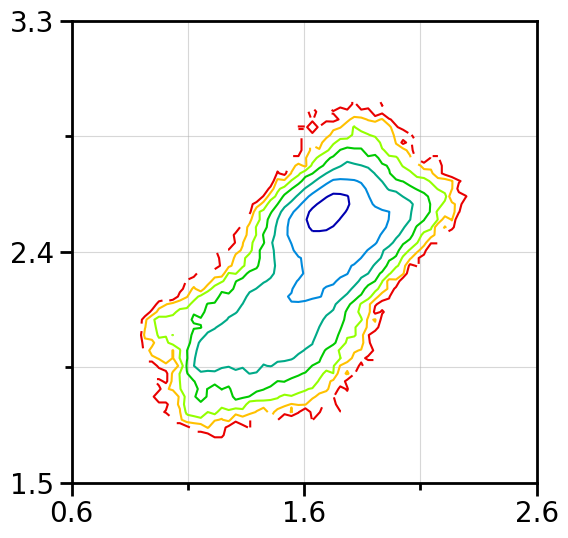

In [50]:
curve = hopened[0]
oname='ch1_l166a_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contour(xb1, xb2, curve, cmap='nipy_spectral', vmin=-5, vmax=0)
#
ax.grid(alpha=0.5, which='both')
ax.set_xlim(xmin,xmax)
ax.set_xticks([0.6,1.6,2.6])
ax.set_ylim(ymin,ymax)
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.xaxis.set_minor_locator(FixedLocator([1.1,2.1]))
ax.yaxis.set_minor_locator(FixedLocator([1.95,2.85]))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

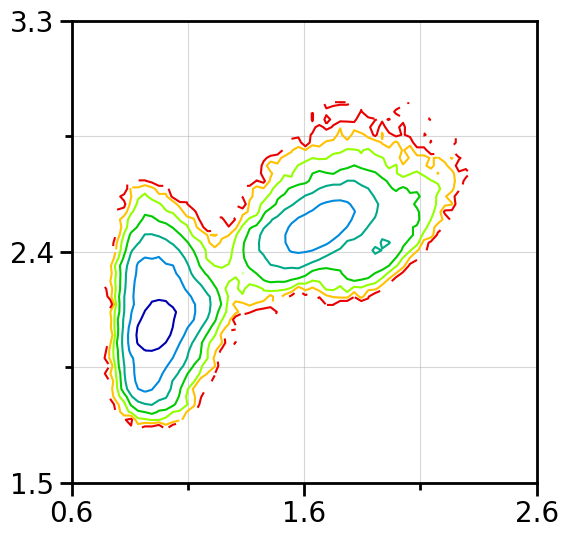

In [55]:
curve = hdecoupled[0]
oname='ch1_f163a_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contour(xb1, xb2, curve, cmap='nipy_spectral', vmin=-5, vmax=0)
#
ax.grid(alpha=0.5, which='both')
ax.set_xlim(xmin,xmax)
ax.set_xticks([0.6,1.6,2.6])
ax.set_ylim(ymin,ymax)
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.xaxis.set_minor_locator(FixedLocator([1.1,2.1]))
ax.yaxis.set_minor_locator(FixedLocator([1.95,2.85]))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

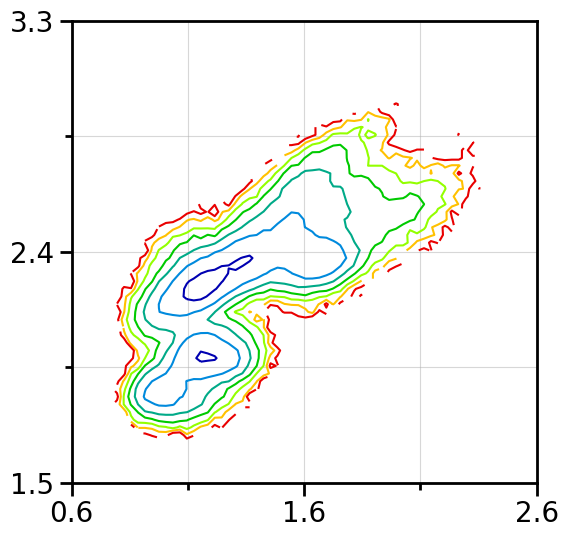

In [63]:
curve = mhdecoupled[4]
oname='ch1_multi_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contour(xb1, xb2, curve, cmap='nipy_spectral', vmin=-5, vmax=0)
#
ax.grid(alpha=0.5, which='both')
ax.set_xlim(xmin,xmax)
ax.set_xticks([0.6,1.6,2.6])
ax.set_ylim(ymin,ymax)
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.xaxis.set_minor_locator(FixedLocator([1.1,2.1]))
ax.yaxis.set_minor_locator(FixedLocator([1.95,2.85]))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

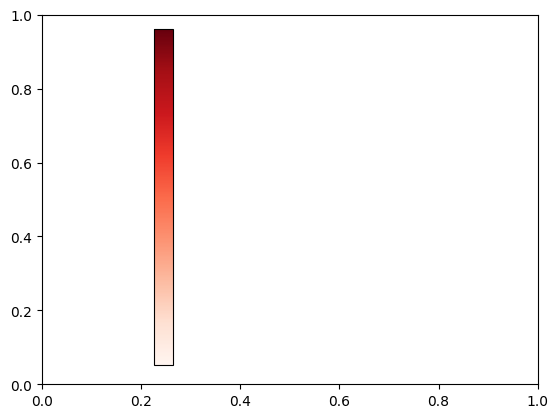

In [25]:
fig,ax=plt.subplots()
cax=fig.add_axes([0.3,0.15,0.03,0.7])
cb=plt.colorbar(cax=cax,
            mappable=mt.cm.ScalarMappable(norm=None, cmap='Reds')
            )
cb.ax.tick_params(labelright=False, length=0)
plt.savefig('saved_plots/cb2.pdf')
plt.show()

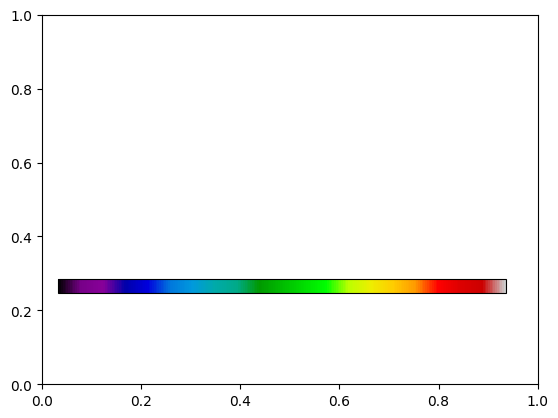

In [28]:
fig,ax=plt.subplots()
cax=fig.add_axes([0.15,0.3,0.7,0.03])
cb=plt.colorbar(cax=cax,
            mappable=mt.cm.ScalarMappable(norm=None, cmap='nipy_spectral'),
            orientation='horizontal')
cb.ax.tick_params(labelbottom=False, length=0)
plt.savefig('saved_plots/cb3.pdf')
plt.show()